<a href="https://colab.research.google.com/github/anncipher/Data_Science_Nigeria_Projects/blob/main/DSN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification algorithms are used to predict labels (discrete values).

## Types of Classification

1. Binary e.g. email spam detection, biometric identification, whether or not a customer will default
2. Multi-class e.g. digit recognition, predict if fruit is mango or orange, dog breed, or predicting a party that wins the election
3. Multi-label e.g. two labels at once (a genre of a movie).

## Importing Modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [ ]:
data = pd.read_csv('Downloads/Social_Network_Ads.csv', delimiter = ',')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [ ]:
data['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

## Pre-processing Data

In [ ]:
# Creating a Label Encoder object

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Invoking fit_transform method on object

data['Gender'] = le.fit_transform(data['Gender'])
data['Gender'].value_counts()

Gender
0    204
1    196
Name: count, dtype: int64

## Exploratory Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [ ]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
# Employees that did not buy and those that bought

left = data.groupby('Purchased')
left.mean()

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,1.569116e+07,0.505837,32.793774,60544.747082
1,1.569222e+07,0.461538,46.391608,86272.727273


## Data Visualization

In [ ]:
# Users that purchased these ads

left_count = left.count()
left_count

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,257,257,257,257
1,143,143,143,143


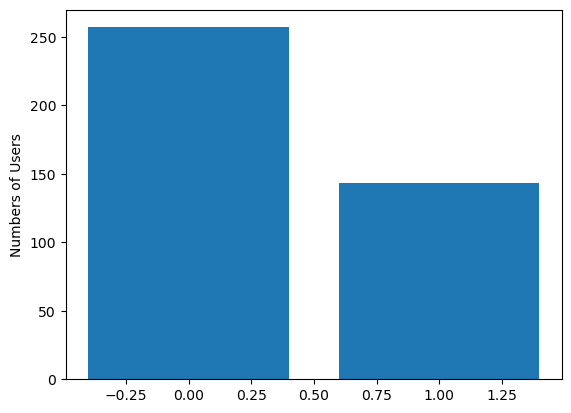

In [ ]:
# How many users were in each category?

plt.bar(left_count.index.values, left_count['User ID'])
plt.ylabel('Numbers of Users')
plt.show()

In [ ]:
# Ratio of users that did buy the ads were only 36%

data.Purchased.value_counts()
float(data.Purchased.value_counts()[1])/ len(data) * 100

35.75

## Feature Engineering

1. Using Age Category

iGen[1-24], Millenials[24-39], GenX[40-54], BabyBoomers[55-73]


In [ ]:


data['Age Category'] = ['iGen' if 0 < age < 25 else 'Millenials' if 24 < age < 40 else 'GenX' if 39 < age < 56 else 'BabyBoomers' if 55 < age < 74 else None
 for age in list(data['Age'].values)]
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category
0,15624510,1,19,19000,0,iGen
1,15810944,1,35,20000,0,Millenials
2,15668575,0,26,43000,0,Millenials
3,15603246,0,27,57000,0,Millenials
4,15804002,1,19,76000,0,iGen


2. Using an Income Category (Interquartile Ranges)

In [ ]:
data['Income Category'] = pd.qcut(data['EstimatedSalary'], 3,labels = ['Low', 'Medium', 'High'])
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category,Income Category
0,15624510,1,19,19000,0,iGen,Low
1,15810944,1,35,20000,0,Millenials,Low
2,15668575,0,26,43000,0,Millenials,Low
3,15603246,0,27,57000,0,Millenials,Medium
4,15804002,1,19,76000,0,iGen,Medium


## Visuals

In [ ]:
age_cat = data.groupby('Age Category').count()
inc_cat = data.groupby('Income Category').count()

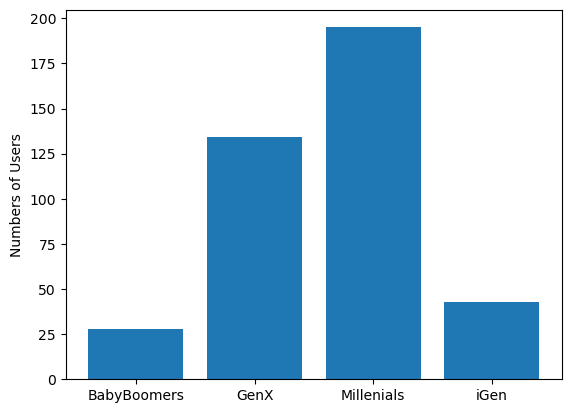

In [ ]:
plt.bar(age_cat.index.values, age_cat['Age'])
plt.ylabel('Numbers of Users')
plt.show()

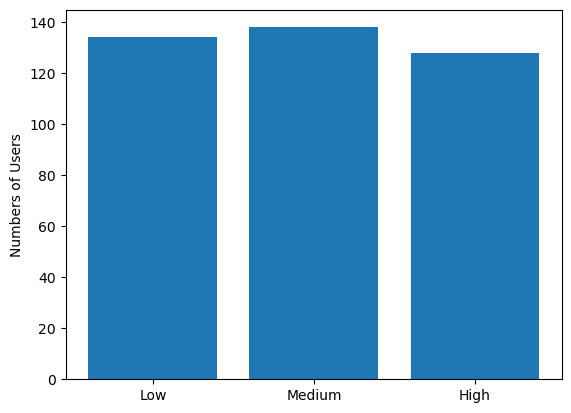

In [ ]:
plt.bar(inc_cat.index.values, inc_cat['Age'])
plt.ylabel('Numbers of Users')
plt.show()

In [ ]:
# data[data['Income Category'] == 'High'].max()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12924\2507587161.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)


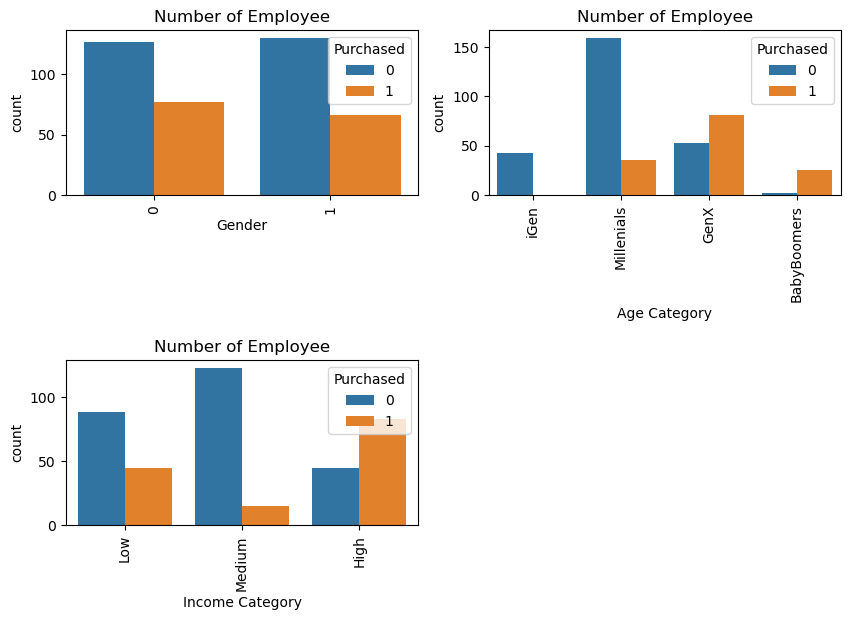

In [ ]:
# What's the statistics based on those who did not make purchase?

features = ['Gender', 'Age Category', 'Income Category']
fig = plt.subplots(figsize = (10,15))
for i, j in enumerate (features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x = j, data = data, hue = 'Purchased')
    plt.xticks(rotation = 90)
    plt.title('Number of Employee')

## Model building

In [ ]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'Age Category', 'Income Category'],
      dtype='object')

In [ ]:
# Split data into features and target

x = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

In [ ]:
# train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# ALGORITHM/MODEL 1: NAIVE BAYES

In [ ]:
# Filling Naive Bayes to the training set

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Predicting the test set results

y_pred = classifier.predict(x_test)

In [ ]:
# Evaluating performance: Accuracy, Precision, Recall

from sklearn import metrics

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred))

Accuracy:  0.925
Precision:  0.975
Recall:  0.8297872340425532


In [ ]:
# Calculate ROC curve

from sklearn.metrics import roc_curve, auc

fpr,tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('ROC AUC', roc_auc)

ROC AUC 0.9080443019527833


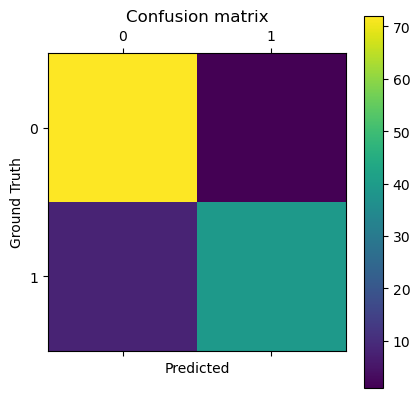

In [ ]:
# Plot Confusion matrix

def conftable(test, pred, imagename):
    confmatrix = metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('Ground Truth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    plt.show()

conftable(y_test, y_pred, 'confusion_matrix.png')